#  Data Storytelling project

In [1]:
import pandas_datareader.data as web
import datetime
import numpy as np

In [2]:
amzn = web.DataReader("AMZN","yahoo",start='2015-01-01',end='2022-01-01')
print(amzn.head())

                  High         Low        Open       Close   Volume  \
Date                                                                  
2014-12-31  312.980011  310.010010  311.549988  310.350006  2048000   
2015-01-02  314.750000  306.959991  312.579987  308.519989  2783200   
2015-01-05  308.380005  300.850006  307.010010  302.190002  2774200   
2015-01-06  303.000000  292.380005  302.239990  295.290009  3519000   
2015-01-07  301.279999  295.329987  297.500000  298.420013  2640300   

             Adj Close  
Date                    
2014-12-31  310.350006  
2015-01-02  308.519989  
2015-01-05  302.190002  
2015-01-06  295.290009  
2015-01-07  298.420013  


In [3]:
start = '2015-01-01'
end = '2022-01-01'
amzn.to_csv(f'amzn_{start}_{end}.csv', index=False)

In [4]:
googl = web.DataReader("GOOGL","yahoo",start='2015-01-01',end='2022-01-01')
print(googl.head())

                  High         Low        Open       Close   Volume  \
Date                                                                  
2014-12-31  538.400024  530.200012  537.739990  530.659973  1232400   
2015-01-02  535.799988  527.880005  532.599976  529.549988  1324000   
2015-01-05  527.989990  517.750000  527.150024  519.460022  2059100   
2015-01-06  521.210022  505.549988  520.500000  506.640015  2722800   
2015-01-07  511.489990  503.649994  510.950012  505.149994  2345900   

             Adj Close  
Date                    
2014-12-31  530.659973  
2015-01-02  529.549988  
2015-01-05  519.460022  
2015-01-06  506.640015  
2015-01-07  505.149994  


In [5]:
googl.to_csv(f'googl_{start}_{end}.csv', index=False)

In [6]:
aapl = web.DataReader("AAPL","yahoo",start='2015-01-01',end='2022-01-01')
aapl.to_csv(f'aapl_{start}_{end}.csv', index=False)

In [7]:
import pandas as pd
amzn_df = pd.read_csv(f'amzn_{start}_{end}.csv')
googl_df = pd.read_csv(f'googl_{start}_{end}.csv')
aapl_df = pd.read_csv(f'aapl_{start}_{end}.csv')

In [8]:
amzn_df['Returns'] = (amzn_df['Close'] - amzn_df['Open'])/amzn_df['Open']

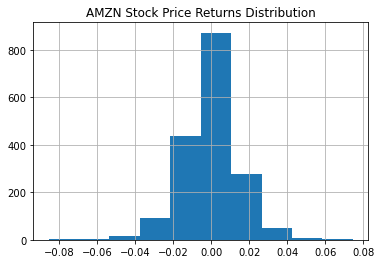

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
amzn_df['Returns'] = (amzn_df['Close'] - amzn_df['Open'])/amzn_df['Open']
amzn_df['Returns'].hist()
plt.title('AMZN Stock Price Returns Distribution')
plt.show()

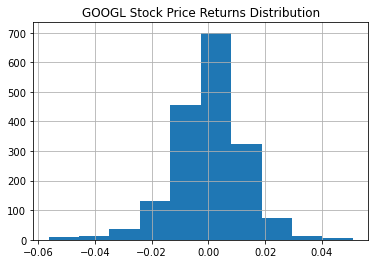

In [10]:
googl_df['Returns'] = (googl_df['Close'] - googl_df['Open'])/googl_df['Open']
googl_df['Returns'].hist()
plt.title('GOOGL Stock Price Returns Distribution')
plt.show()

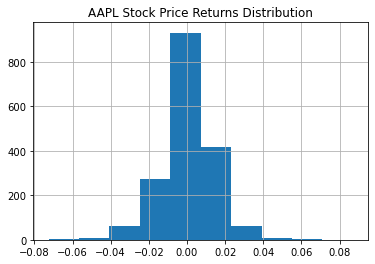

In [11]:
aapl_df['Returns'] = (aapl_df['Close'] - aapl_df['Open'])/aapl_df['Open']
aapl_df['Returns'].hist()
plt.title('AAPL Stock Price Returns Distribution')
plt.show()

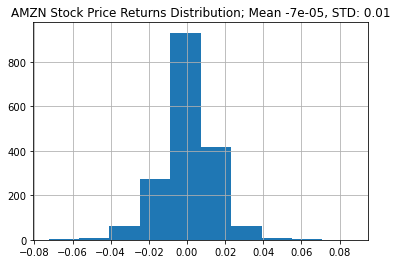

In [13]:
aapl_df['Returns'].hist()
mean_amnz_returns = np.round(amzn_df['Returns'].mean(), 5)
std_amnz_returns = np.round(amzn_df['Returns'].std(), 2)
plt.title(f'AMZN Stock Price Returns Distribution; Mean {mean_amnz_returns}, STD: {std_amnz_returns}')
plt.show()

In [16]:
amzn_df['Ticker'] = 'AMZN'
googl_df['Ticker'] = 'GOOGL'
aapl_df['Ticker'] = 'AAPL'
df = pd.concat([amzn_df, googl_df,aapl_df])
df = df[['Ticker', 'Returns']]
print(df.head())

  Ticker   Returns
0   AMZN -0.003852
1   AMZN -0.012989
2   AMZN -0.015700
3   AMZN -0.022995
4   AMZN  0.003092


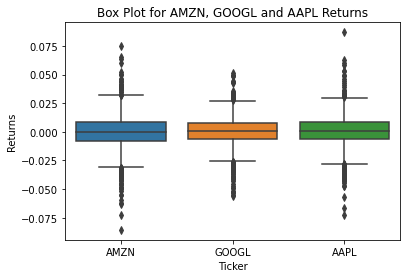

In [17]:
sns.boxplot(x= df['Ticker'], y = df['Returns'])
plt.title('Box Plot for AMZN, GOOGL and AAPL Returns')
plt.show()


In [20]:
df_corr = pd.DataFrame({'AMZN':amzn_df['Returns'], 'GOOGL':googl_df['Returns'],'AAPL':aapl_df['Returns']})

<AxesSubplot:>

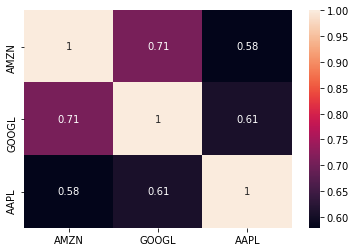

In [21]:
sns.heatmap(df_corr.corr(), annot=True)

C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Date')

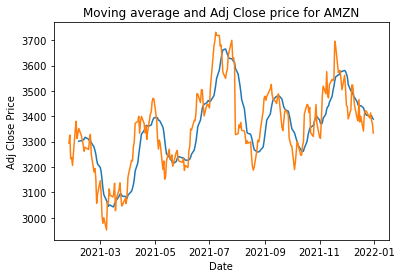

In [22]:
cutoff = datetime.datetime(2021,1,23)
amzn_df['Date'] = pd.to_datetime(amzn.index, format='%Y/%m/%d')
amzn_df = amzn_df[amzn_df['Date'] > cutoff]
amzn_df['SMA_10'] = amzn_df['Close'].rolling(window=10).mean()
#print(amzn_df.head())
plt.plot(amzn_df['Date'], amzn_df['SMA_10'])
plt.plot(amzn_df['Date'], amzn_df['Adj Close'])
plt.title('Moving average and Adj Close price for AMZN')
plt.ylabel('Adj Close Price')
plt.xlabel('Date')

C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Date')

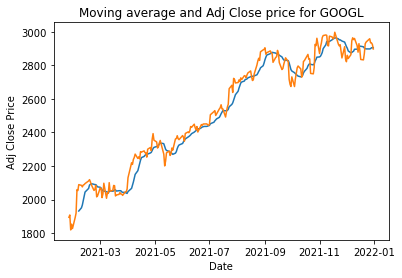

In [23]:
cutoff = datetime.datetime(2021,1,23)
googl_df['Date'] = pd.to_datetime(googl.index, format='%Y/%m/%d')
googl_df = googl_df[googl_df['Date'] > cutoff]
googl_df['SMA_10'] = googl_df['Close'].rolling(window=10).mean()
#print(googl_df.head())
plt.plot(googl_df['Date'], googl_df['SMA_10'])
plt.plot(googl_df['Date'], googl_df['Adj Close'])
plt.title('Moving average and Adj Close price for GOOGL')
plt.ylabel('Adj Close Price')
plt.xlabel('Date')


C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Date')

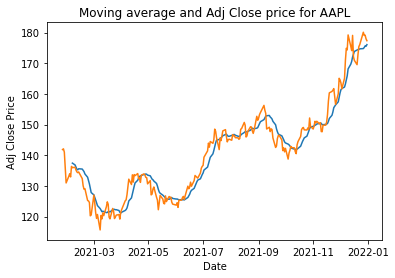

In [24]:
cutoff = datetime.datetime(2021,1,23)
aapl_df['Date'] = pd.to_datetime(aapl.index, format='%Y/%m/%d')
aapl_df = aapl_df[aapl_df['Date'] > cutoff]
aapl_df['SMA_10'] = aapl_df['Close'].rolling(window=10).mean()
#print(aapl_df.head())
plt.plot(aapl_df['Date'], aapl_df['SMA_10'])
plt.plot(aapl_df['Date'], aapl_df['Adj Close'])
plt.title('Moving average and Adj Close price for AAPL')
plt.ylabel('Adj Close Price')
plt.xlabel('Date')


C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

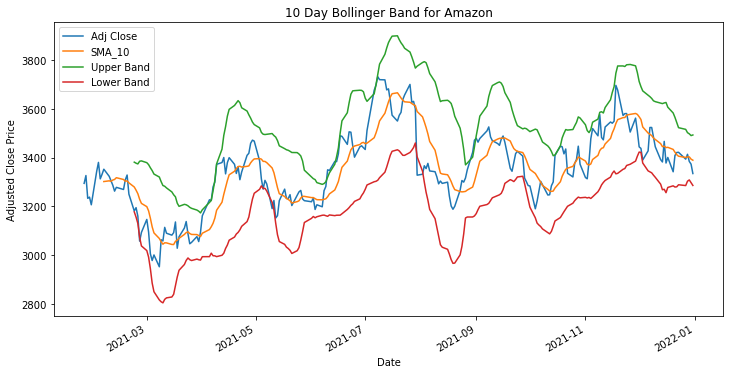

In [26]:
amzn_df['SMA_10_STD'] = amzn_df['Adj Close'].rolling(window=20).std()
amzn_df['Upper Band'] = amzn_df['SMA_10'] + (amzn_df['SMA_10_STD'] * 2)
amzn_df['Lower Band'] = amzn_df['SMA_10'] - (amzn_df['SMA_10_STD'] * 2)
amzn_df.index = amzn_df['Date']
amzn_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('10 Day Bollinger Band for Amazon')
plt.ylabel('Adjusted Close Price')
plt.show()

C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pruthul\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

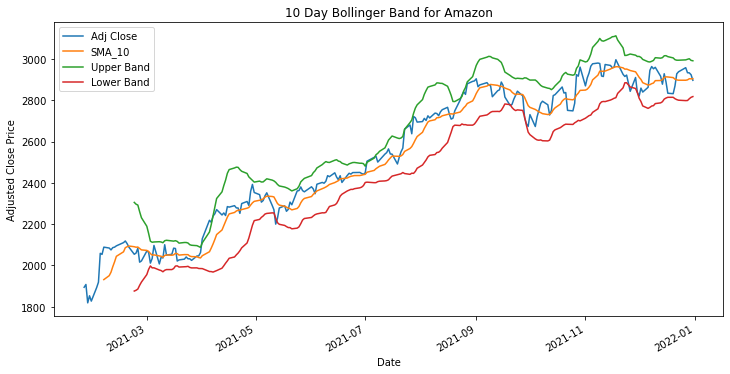

In [27]:
googl_df['SMA_10_STD'] = googl_df['Adj Close'].rolling(window=20).std()
googl_df['Upper Band'] = googl_df['SMA_10'] + (googl_df['SMA_10_STD'] * 2)
googl_df['Lower Band'] = googl_df['SMA_10'] - (googl_df['SMA_10_STD'] * 2)
googl_df.index = googl_df['Date']
googl_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('10 Day Bollinger Band for Amazon')
plt.ylabel('Adjusted Close Price')
plt.show()


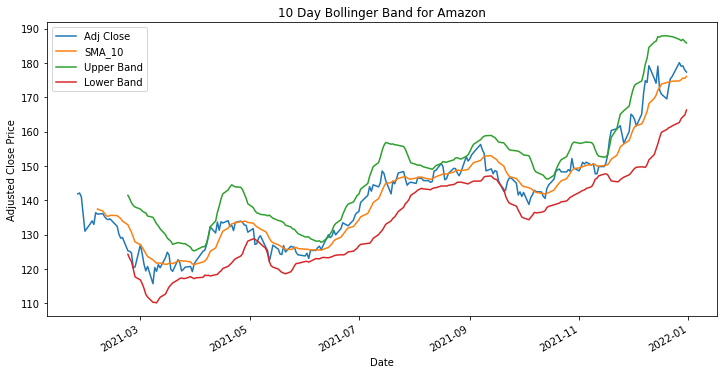

In [28]:
aapl_df['SMA_10_STD'] = aapl_df['Adj Close'].rolling(window=20).std()
aapl_df['Upper Band'] = aapl_df['SMA_10'] + (aapl_df['SMA_10_STD'] * 2)
aapl_df['Lower Band'] = aapl_df['SMA_10'] - (aapl_df['SMA_10_STD'] * 2)
aapl_df.index = aapl_df['Date']
aapl_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('10 Day Bollinger Band for Amazon')
plt.ylabel('Adjusted Close Price')
plt.show()

